<h1 align="center" style='font-size: 38px;'>
How have culture and technology shaped five decades of hit songs?
</h1>

<table>
    <tr>
        <td> <img src="https://images.aftonbladet-cdn.se/v2/images/1c1ada48-1a7e-430b-a69e-9e88053bde8a?fit=crop&format=auto&h=1322&q=50&w=1900&s=19ad0477d4ef399c9c6cbce5aad6faf15383435f" alt="Abba" style="width: 270px;"/> </td>
        <td> <img src="https://www.billboard.com/wp-content/uploads/media/06-U2-timeline-billboard-1548.jpg?w=1024" alt="U2" style="width: 270px;"/> </td>
        <td> <img src="https://cdn.britannica.com/02/162002-050-02512608/Tupac-Shakur-1993.jpg" alt="2Pac" style="width: 270px;"/> </td>
        <td> <img src="https://www.rollingstone.com/wp-content/uploads/2022/12/britney-spears-2000.jpg?w=831&h=554&crop=1" alt="Britney Spears" style="width: 270px;"/> </td>
        <td> <img src="https://djmagmx.com/wp-content/uploads/2018/01/calvinharris.jpg" alt="Calvin Harris" style="width: 270px;"/> </td>
    </tr>
</table>


<p style='text-align: center; font-size: 18px; font-style: italic;'> 
I'm diving into the top hits from 1970 to 2019 to see how music has evolved over time. <br>
Using data from Spotify, I'll explore how musical trends have moved with culture and technology. <br>
From the 1970s to today's tracks, let's discover what has shaped peoples vinyl stacks, CD collections, and playlists. 
</p>

***

# 1. Introduction


Music is more than just melodies and rhythms. It's a reflection of society, evolving with cultural shifts and technological advancements in both music production and how we consume music.<br>
My goal with this analysis is two-folded. First I want to dig deeper into the spotify hit lists over the years and look into any major shifts throughout the decades. Second I want to have a look at modern hits and see if it is possible to learn what is needed to create a hit song today.

***

# 2. Setting up the environment

I will primarily be using pandas for data manipulation and matplotlib/seaborn for visualisations. I might import additional libraries later on if needed.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../data/top_hits_1970_to_2019_cleaned.csv') # import data

### 2.1 Data overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4997 non-null   object 
 1   artist            4997 non-null   object 
 2   popularity        4997 non-null   int64  
 3   explicit          4997 non-null   bool   
 4   energy            4997 non-null   float64
 5   tempo             4997 non-null   float64
 6   positiveness      4997 non-null   float64
 7   danceability      4997 non-null   float64
 8   acousticness      4997 non-null   float64
 9   loudness          4997 non-null   float64
 10  mode              4997 non-null   object 
 11  duration_minutes  4997 non-null   float64
 12  key               4997 non-null   object 
 13  album_name        4997 non-null   object 
 14  year              4997 non-null   int64  
dtypes: bool(1), float64(7), int64(2), object(5)
memory usage: 551.6+ KB


In [8]:
df.head(5)

,name,artist,popularity,explicit,energy,tempo,positiveness,danceability,acousticness,loudness,mode,duration_minutes,key,album_name,year
0,Let It Be - Remastered 2009,The Beatles,79,False,0.403,143.462,0.410,0.443,0.6310,-8.339,Major,4.1,C,Let It Be (Remastered),1970
1,Cecilia,Simon & Garfunkel,76,False,0.876,102.762,0.954,0.755,0.3570,-8.867,Major,2.9,C,Bridge Over Troubled Water,1970
2,Son of a Preacher Man,Aretha Franklin,38,False,0.473,77.583,0.561,0.474,0.5450,-11.454,Major,3.3,D,The Queen Of Soul,1970
3,Who'll Stop The Rain,Creedence Clearwater Revival,65,False,0.797,123.566,0.622,0.598,0.0424,-6.793,Major,2.5,G,Cosmo's Factory (Expanded Edition),1970
4,I Want You Back,The Jackson 5,80,False,0.538,196.605,0.886,0.469,0.3050,-13.559,Major,2.9,Gsharp/Aflat,Diana Ross Presents The Jackson 5,1970


### 2.2 Data dictionairy

- **name** - Name of the song
- **artist** - Name of the artist
- **popularity** - The popularity of a track is a value between 0 and 100, with 100 being the most popular
- **explicit** - If the song is explicit (True), or not (False)
- **energy** - Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity
- **tempo** - Bpm of song (Beats per minute)
- **positiveness** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
- **danceability** - Describes how suitable a track is for dancing based on a combination of musical elements
- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic
- **loudness** - The overall loudness of a track in decibels (dB)
- **mode** - Indicates the modality (major or minor) of a track
- **duration_minutes** - Duration of the track in minutes
- **key** - The key the track is in (C, Csharp, etc)
- **album_name** - Name of the album
- **year** - What year the song was released

***

# 3. Exploring the data

In [10]:
columns_to_count = ['name', 'artist', 'album_name']

# count unique song names, artist names, album names
for col in columns_to_count:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

name: 4658 unique values
artist: 1938 unique values
album_name: 3521 unique values


So this dataset contains 4658 unique song names, coming from 1938 different artists and spread across 3521 albums.
Seems like a good spread!<br>Unfortunately it was not possible to get the genres of the songs from the API and I have tried and failed several times to get this data from other sources.

Let's have a look at some of the attributes in the dataset. For the linecharts, I will be using moving averages with a window of five years to smoothen out the curves and give a better overview of the data.

### 3.1 Energy, positiveness, and danceability over time

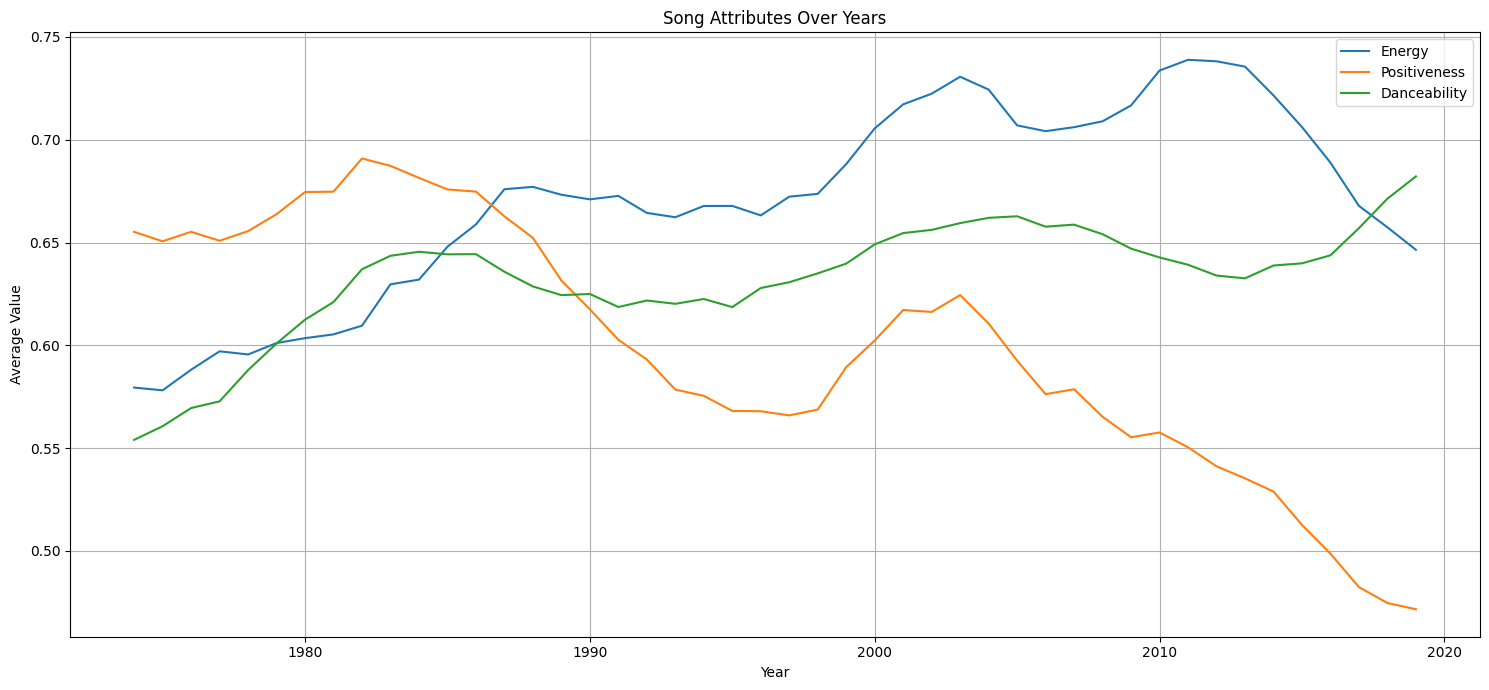

In [33]:
columns_attr_linechart = ['energy', 'positiveness', 'danceability']

# group data by year and calculate mean for each column
grouped_data_attr = df.groupby('year')[columns_attr_linechart].mean()

# 5 year rolling average (fair?)
window_size = 5  

# get moving average of columns
grouped_data_attr = grouped_data_attr.rolling(window=window_size).mean()


plt.figure(figsize=(15, 7))

# plot moving averages of attributes (loop this)
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='energy', label='Energy')
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='positiveness', label='Positiveness')
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='danceability', label='Danceability')

# set title and labels
plt.title('Song Attributes Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')

# display legend and grid lines
plt.legend()
plt.grid(True)

# adjust layout
plt.tight_layout()

# show plot
plt.show()

**NOTES HERE**

### 3.2 Acousticness and Loudness

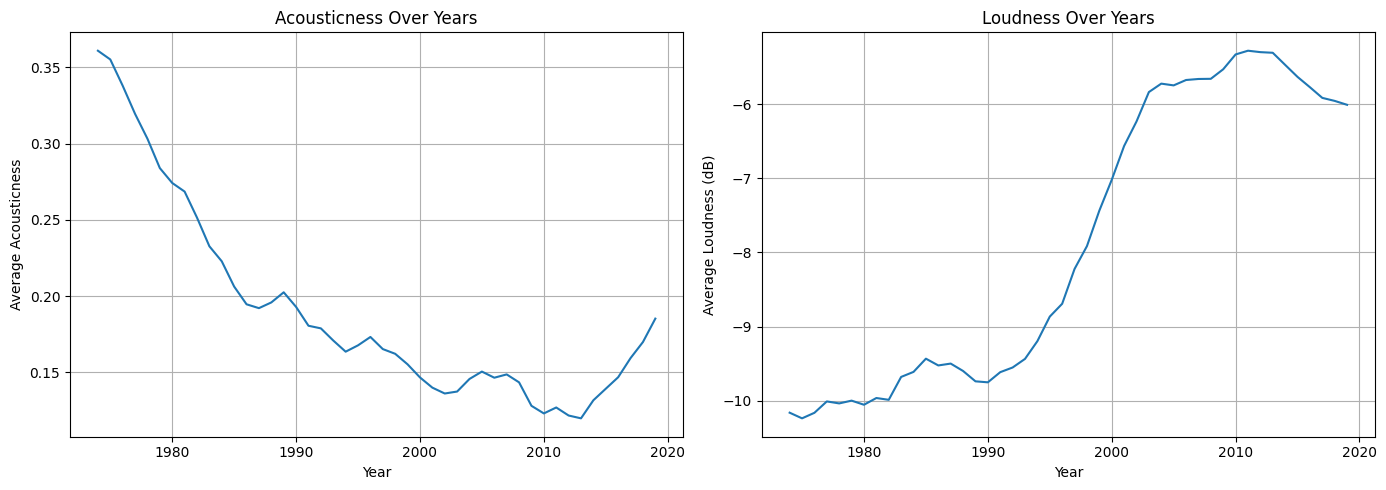

In [32]:
window_size = 5  
# MAKE FUNCTION FOR THE MOVING AVERAGE CALCS (DRY)

# group data by year and get mean for acousticness
grouped_data_acous = df.groupby('year')[['acousticness']].mean()

# calc moving avg of acousticness
grouped_data_acous['acousticness_moving'] = grouped_data_acous['acousticness'].rolling(window=window_size).mean()

# group data by year and get mean for loudness
grouped_data_loud = df.groupby('year')[['loudness']].mean()

# calc moving average for loudness
grouped_data_loud['loudness_moving'] = grouped_data_loud['loudness'].rolling(window=window_size).mean()


plt.figure(figsize=(14, 5))

# acousticness plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot (think css grid)
sns.lineplot(data=grouped_data_acous, x=grouped_data_acous.index, y='acousticness_moving')
plt.title('Acousticness Over Years')
plt.ylabel('Average Acousticness')
plt.xlabel('Year')
plt.grid(True)

# loudness plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot (think css grid)
sns.lineplot(data=grouped_data_loud, x=grouped_data_loud.index, y='loudness_moving')
plt.title('Loudness Over Years')
plt.ylabel('Average Loudness (dB)')
plt.xlabel('Year')
plt.grid(True)


plt.tight_layout()
plt.show()

**NOTES HERE**

### 3.3 Explicit, Mode, and Key

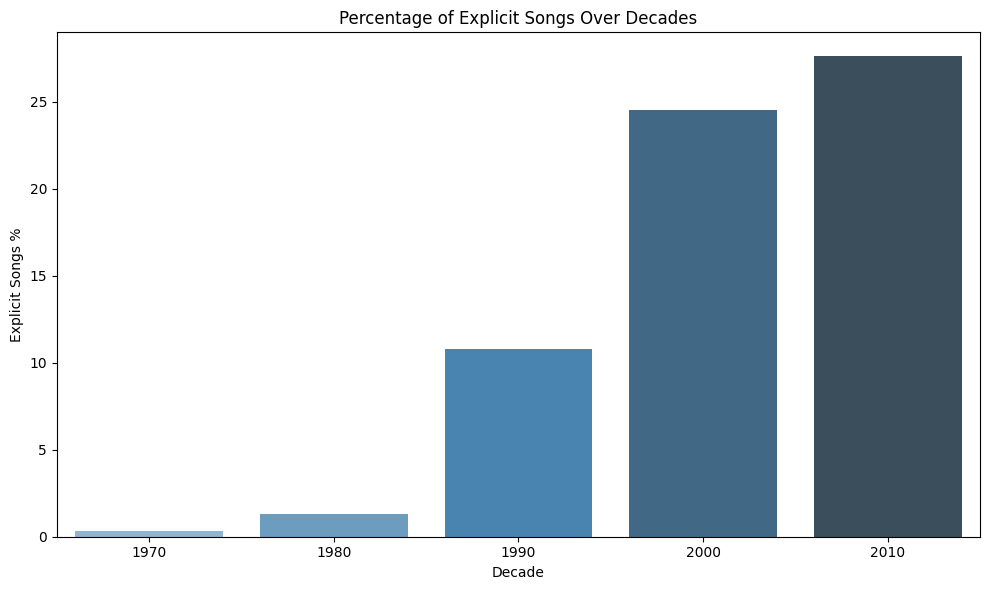

In [67]:
# set decades instead of years (cleaner)
decades = (df['year'] // 10) * 10

# filter dataframe for explicit songs, count for every decade
explicit_counts = df[df['explicit']].groupby(decades).size() # will only store True values

# set percentage
total_counts = df.groupby(decades).size()
explicit_counts_percentage = (explicit_counts / total_counts) * 100

# convert series to df
df_percentage = explicit_counts_percentage.reset_index()
df_percentage.columns = ['decade', 'explicit_percentage']

# barplot of explicit percentage
plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='explicit_percentage', data=df_percentage, palette="Blues_d")

plt.title('Percentage of Explicit Songs Over Decades')
plt.ylabel('Explicit Songs %')
plt.xlabel('Decade')

plt.tight_layout()
plt.show()

**NOTES HERE**